# Configuración Inicial

In [1]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px


[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/luis/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /home/luis/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /home/luis/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/luis/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /home/luis/nltk_data..

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


#Bi-gramas
* Parejas de palabras que ocurren consecutivas.

In [2]:
# frecuencia de distribucion de la cantidad de veces que aparecen los bigramas
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [3]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

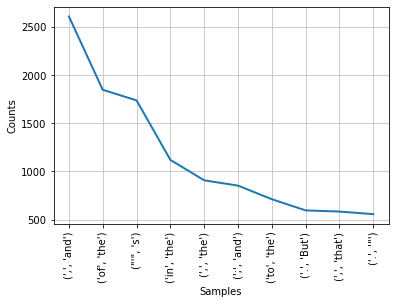

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
fdist.plot(10)

## Filtrado de bi-gramas
* Sin embargo, observamos que los bi-gramas más comunes no representan realmente frases o estructuras léxicas de interes.
* Tal vez, aplicar algun tipo de filtro nos permita ver estructuras más relevantes.

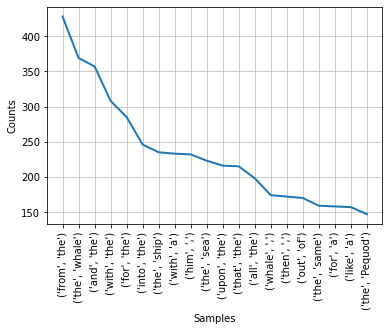

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold]

filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Trigramas

In [6]:
from nltk.util import ngrams

md_trigrams = list(ngrams(text1, 3))

fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

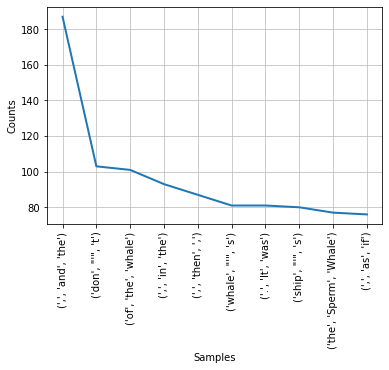

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [7]:
fdist.plot(10)

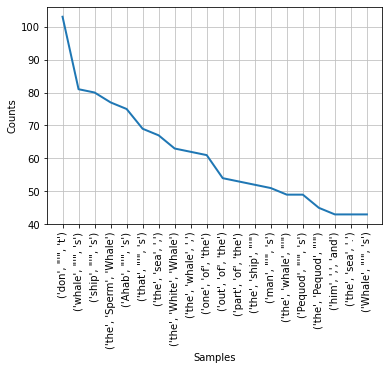

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
threshold = 2
filtered_trigrams = [
    trigram for trigram in md_trigrams if len(trigram[0]) > threshold
]

filtered_dist = FreqDist(filtered_trigrams)
filtered_dist.plot(20)

# Collocations (Colocaciones)

* Son secuencias de palabras que suelen ocurrir en textos o conversaciones con una **frecuencia inusualmente alta** [NLTK doc](http://www.nltk.org/book/ch01.html)
* Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse tipicamente esa palabra [Manning & Schütze, 1990, Foundations of Statistical Natural Language Processing, Capítulo 6](https://nlp.stanford.edu/fsnlp/)

In [25]:
mb_bigrams = list(bigrams(text1))
# mb_bigrams

threshold = 2

filtered_bigrams = [bigram for bigram in mb_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)

# filtered_bigram_dist

filtered_words = [word for word in text1 if len(word) > threshold]

filtered_words_dist = FreqDist(filtered_words)

df = pd.DataFrame()

df['bi_gram'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_gram'].apply(lambda x: x[0])
df['word_1'] = df['bi_gram'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_gram'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] =  df['word_0'].apply(lambda x: filtered_words_dist[x])
df['word_1_freq'] =  df['word_1'].apply(lambda x: filtered_words_dist[x])


In [26]:
df

bi_gram     word_0    word_1  bi_gram_freq  word_0_freq  \
0      (three, gigantic)      three  gigantic             1          237   
1         (air, without)        air   without             1          141   
2      (carpenter, made)  carpenter      made             1           39   
3            (has, lost)        has      lost             2          287   
4         (himself, fit)    himself       fit             1          203   
...                  ...        ...       ...           ...          ...   
67937        (with, tar)       with       tar             1         1659   
67938      (and, rented)        and    rented             1         6024   
67939        (,--, when)        ,--      when             1           86   
67940         (pay, her)        pay       her             1           18   
67941        (the, male)        the      male             2        13721   

       word_1_freq  
0               20  
1              154  
2              178  
3               45  
4               16  
...            ...  
67937            9  
67938            1  
67939          553  
67940          329  
67941            6  

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)

información mutua punto a punto

Una métrica basada en _teoria de la información_ para encontrar **Collocations**.

$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

la probabilidad de aparicion del bigrama dividido entre la probabilidad de aparicion de cada palabra por separado.

si la PMI calculada es muy grande es porque probablemente es una colocación.

In [27]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(
    lambda x: np.log2(x.values[0] / (x.values[1] * x.values[2])), axis=1)



In [28]:
df['PMI']

0       -12.210671
1       -14.406338
2       -12.761136
3       -12.656760
4       -11.665336
           ...    
67937   -13.866023
67938   -12.556506
67939   -15.537400
67940   -12.531869
67941   -15.329061
Name: PMI, Length: 67942, dtype: float64

In [30]:
df.sort_values(by='PMI', ascending=False)

bi_gram        word_0     word_1  bi_gram_freq  \
26767         (volatile, salts)      volatile      salts             1   
32318  (Historically, Regarded)  Historically   Regarded             1   
4372          (Juan, Fernandes)          Juan  Fernandes             1   
28339           (howls, louder)         howls     louder             1   
50407           (miller, shuts)        miller      shuts             1   
...                         ...           ...        ...           ...   
47307                (man, the)           man        the             1   
65814               (some, the)          some        the             1   
58295                (one, the)           one        the             1   
16966                (the, not)           the        not             1   
4346                 (the, but)           the        but             1   

       word_0_freq  word_1_freq        PMI  
26767            1            1   0.000000  
32318            1            1   0.000000  
4372             1            1   0.000000  
28339            1            1   0.000000  
50407            1            1   0.000000  
...            ...          ...        ...  
47307          508        13721 -22.732783  
65814          578        13721 -22.919024  
58295          889        13721 -23.540138  
16966        13721         1103 -23.851315  
4346         13721         1113 -23.864336  

[67942 rows x 7 columns]

El valor de PMI, se entienden que los bigramas con mas probabilidad de ser colocaciones son aquellos con valores cercanos a 0

In [31]:
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))
df.head()

bi_gram     word_0    word_1  bi_gram_freq  word_0_freq  \
0  (three, gigantic)      three  gigantic             1          237   
1     (air, without)        air   without             1          141   
2  (carpenter, made)  carpenter      made             1           39   
3        (has, lost)        has      lost             2          287   
4     (himself, fit)    himself       fit             1          203   

   word_1_freq        PMI  log(bi_gram_freq)  
0           20 -12.210671                0.0  
1          154 -14.406338                0.0  
2          178 -12.761136                0.0  
3           45 -12.656760                1.0  
4           16 -11.665336                0.0

In [32]:
fig = px.scatter(
  x=df['PMI'].values,
  y=df['log(bi_gram_freq)'],
  color=df['PMI'] + df['log(bi_gram_freq)'],
  hover_name=df['bi_gram'],
  width=600,
  height=600,
  labels={
    'x' : 'PMI',
    'y': 'Log(Bigram Frequency)',
  },
)
fig.show()

# Medidas pre-construidas en NLTK

# Textos en Español 

# Referencias para seguir aprendiendo


*   [Mas sobre Colocaciones con NLTK](http://www.nltk.org/howto/collocations.html)
*   

